В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
cars_df = pd.read_csv('/content/cars.csv')
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [4]:
print(cars_df.dtypes)

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object


In [5]:
for col in cars_df.columns:
    if cars_df[col].dtype == 'object':
        print(f"\nКолонка: {col}")
        print(cars_df[col].map(type).value_counts())


Колонка: Brand
Brand
<class 'str'>    100
Name: count, dtype: int64

Колонка: Model
Model
<class 'str'>    100
Name: count, dtype: int64

Колонка: Fuel_Type
Fuel_Type
<class 'str'>    100
Name: count, dtype: int64

Колонка: Transmission
Transmission
<class 'str'>    100
Name: count, dtype: int64

Колонка: Owner_Type
Owner_Type
<class 'str'>    100
Name: count, dtype: int64


In [6]:
categorical_cols = cars_df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"Колонка: {col}")
    print(f"Кількість унікальних значень: {cars_df[col].nunique()}")
    print(f"Унікальні значення: {cars_df[col].unique()[:10]}")  # покажемо перші 10, щоб не захаращувати
    print("-" * 40)


Колонка: Brand
Кількість унікальних значень: 11
Унікальні значення: ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW']
----------------------------------------
Колонка: Model
Кількість унікальних значень: 58
Унікальні значення: ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1']
----------------------------------------
Колонка: Fuel_Type
Кількість унікальних значень: 2
Унікальні значення: ['Petrol' 'Diesel']
----------------------------------------
Колонка: Transmission
Кількість унікальних значень: 2
Унікальні значення: ['Manual' 'Automatic']
----------------------------------------
Колонка: Owner_Type
Кількість унікальних значень: 3
Унікальні значення: ['First' 'Second' 'Third']
----------------------------------------


У датафреймі cars 8 числових колонок та 5 категоріальних колонок.
Ці категоріальні колонки такі:
- бінарні - відсутні
- мультикатегоріальні без порядку - Brand, Model, Transmission, Fuel_Type (більше або дорівнює 2-м значенням) зі значеннями, для яких немає відношення порядку
- мультикатегоріальні з порядком - Owner_Type в яких можна встановити відношення порядку ('First'->'Second'->'Third')

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
? train_test_split

In [25]:
inputs, targets = cars_df[['Brand', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
                           'Mileage', 'Engine', 'Power', 'Seats']], cars_df['Price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

Завдання 4.1

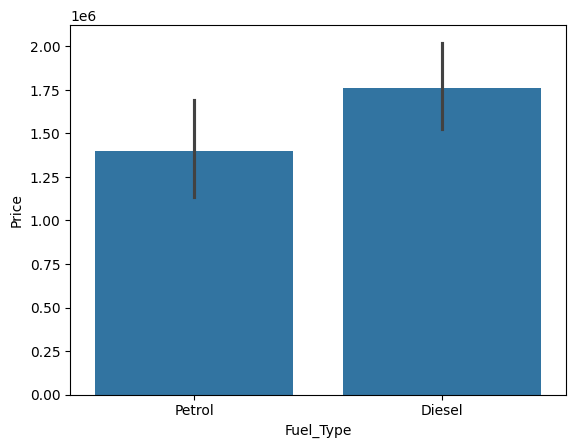

In [30]:
sns.barplot(data=cars_df, x='Fuel_Type', y='Price');

In [36]:
Fuel_Type_codes = {'Petrol': 0, 'Diesel': 1}
cars_df['Fuel_Type_codes'] = cars_df.Fuel_Type.map(Fuel_Type_codes)

In [37]:
cars_df.Price.corr(cars_df.Fuel_Type_codes)

np.float64(0.18096358734385454)

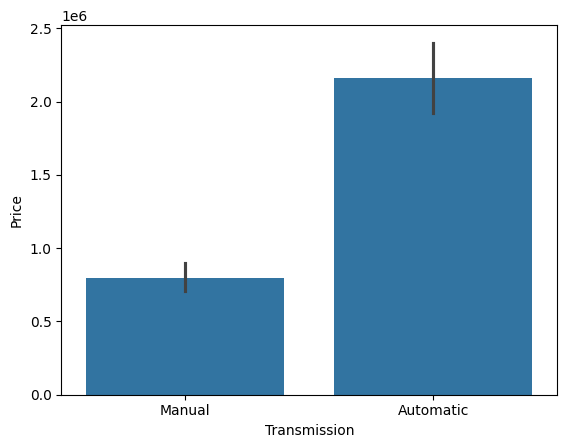

In [35]:
sns.barplot(data=cars_df, x='Transmission', y='Price');

In [38]:
Transmission_codes = {'Manual': 0, 'Automatic': 1}
cars_df['Transmission_codes'] = cars_df.Transmission.map(Transmission_codes)

In [39]:
cars_df.Price.corr(cars_df.Transmission_codes)

np.float64(0.6764835122739136)

Завдання 4.2

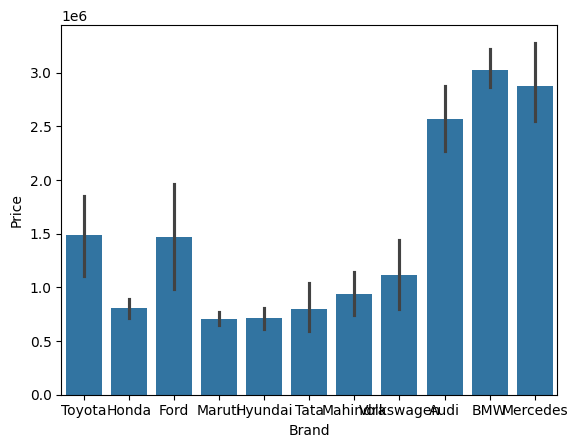

In [46]:
sns.barplot(data=cars_df, x='Brand', y='Price');

In [60]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [61]:
# Навчаємо на X_train
brand_ohe_train = encoder.fit_transform(X_train[['Brand']])

In [62]:
# Трансформуємо X_test
brand_ohe_test = encoder.transform(X_test[['Brand']])

In [63]:
brand_ohe_train_df = pd.DataFrame(
    brand_ohe_train,
    columns=encoder.get_feature_names_out(['Brand']),
    index=X_train.index)

brand_ohe_test_df = pd.DataFrame(
    brand_ohe_test,
    columns=encoder.get_feature_names_out(['Brand']),
    index=X_test.index)

In [64]:
# Додаємо закодовані one-hot колонки до X_train і X_test
X_train = X_train.join(brand_ohe_train_df)
X_test = X_test.join(brand_ohe_test_df)

Завдання 4.3

In [65]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [67]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,Volkswagen,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,2018,28000,Diesel,Automatic,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,2018,28000,Petrol,Automatic,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,Audi,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,2019,26000,Petrol,Manual,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,2019,26000,Petrol,Manual,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

після категоризації колонки Owner_Type, я бачу що значення для:
- First - 0
- Second -1
- Third - 2

І в нас з'явилась нова колонка Owner_Type_Codes



**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [73]:
X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test.select_dtypes(include=['int64', 'float64'])

In [85]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,2019,22000,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,2018,28000,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2018,28000,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2017,32000,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,2017,26000,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [74]:
train_df = pd.concat([X_train,y_train], axis=1)
train_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Price
83,2019,22000,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000
55,2018,28000,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
26,2018,28000,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000
54,2017,32000,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000
19,2017,26000,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2020,30000,23,1248,74,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,600000
2,2017,20000,10,4951,395,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500000
6,2018,45000,15,2179,140,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,900000
27,2019,22000,18,1995,187,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2800000


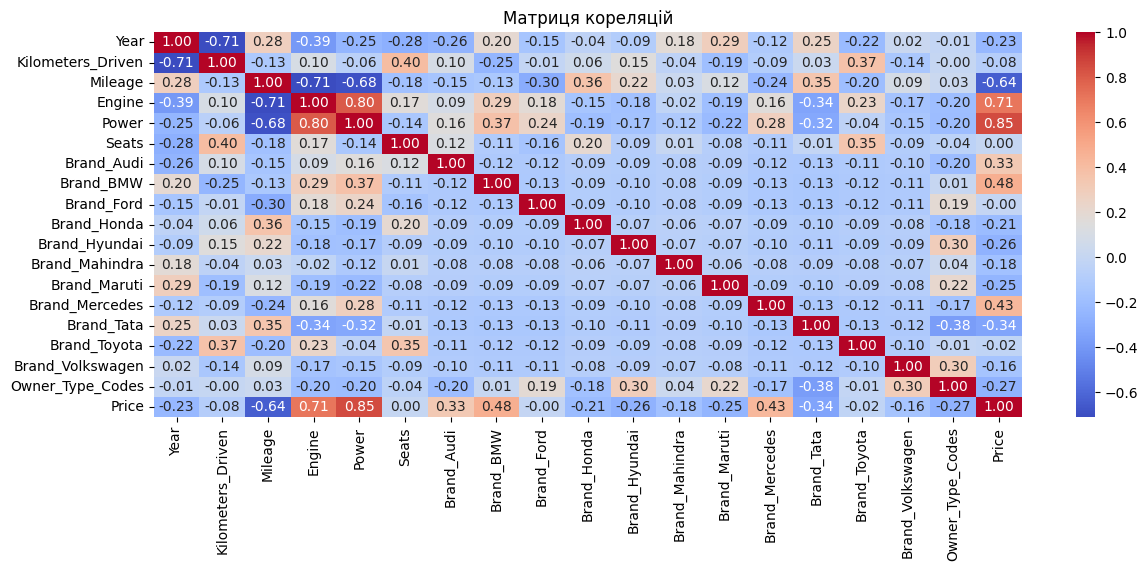

In [82]:
# матриця кореляцій
corr_matrix = train_df.corr(numeric_only=True)

plt.figure(figsize=(14, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матриця кореляцій")
plt.show()


Висновок:
По колонці прайс ми бачимо, що позитивна кориляція спостерігається по змінній Power (0.85), Engine(0.71) та Mileage (-0.64).

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# 1 Ініціалізуємо модель
model = LinearRegression().fit(X_train, y_train)

#2 передбачення
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

#mean_squared_error
loss_train = np.sqrt(mean_squared_error(y_train, predictions_train))
loss_test = np.sqrt(mean_squared_error(y_test, predictions_test))

In [102]:
loss_train, loss_test

(np.float64(252808.49663966076), np.float64(249429.03130771223))

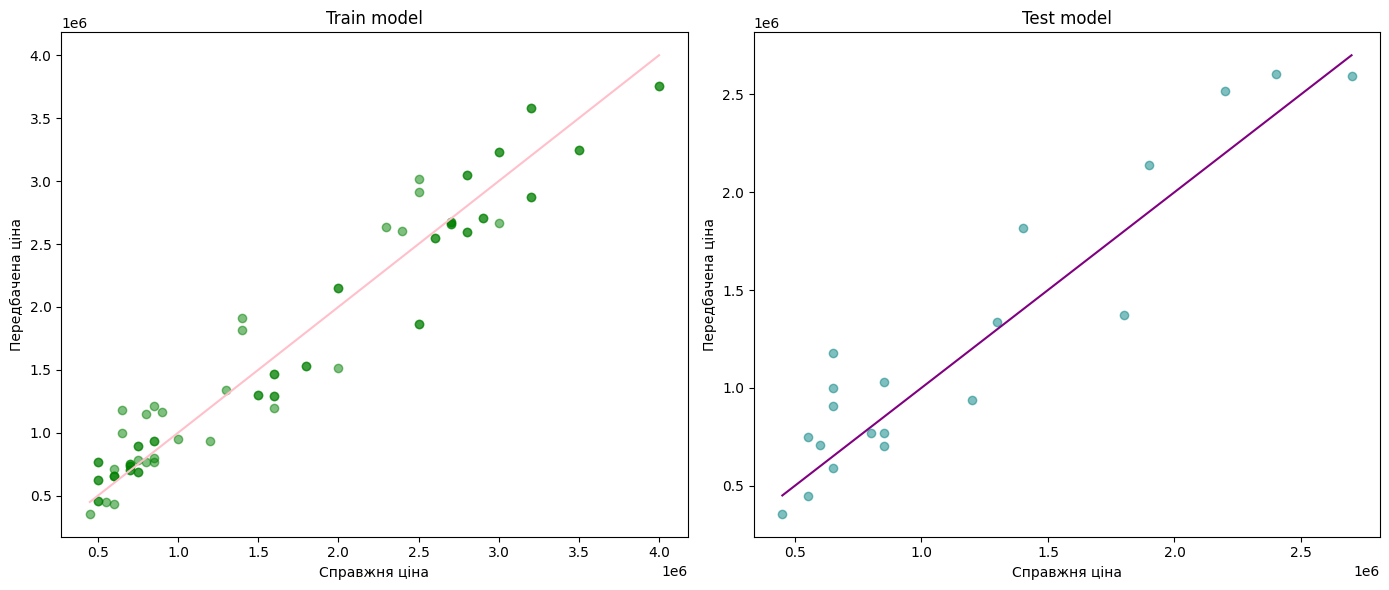

In [116]:
#3
# 4. Графік для тренувальних даних
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, predictions_train, alpha=0.5, color='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='pink')
plt.xlabel("Справжня ціна")
plt.ylabel("Передбачена ціна") #predictions_train
plt.title("Train model")

# Графік для тестових даних
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_test, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='purple')
plt.xlabel("Справжня ціна")
plt.ylabel("Передбачена ціна") #predictions_test
plt.title("Test model")

plt.tight_layout()
plt.show()


точки лежать доволі близько до лінії, можна припустити, що модель передбачає добре.


**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

Завдання 7.1

In [120]:
from sklearn.preprocessing import StandardScaler

In [130]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [131]:
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

StandardScaler()

In [143]:
# Масштабуємо тренувальні дані
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.transform(X_train[numeric_cols])

In [144]:
# Масштабуємо тестові дані
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [145]:
from sklearn.linear_model import LinearRegression

# Ініціалізація моделі
model = LinearRegression().fit(X_train_scaled[numeric_cols], y_train)


Завдання 7.2

In [148]:
# розрахунок коеф.
coefficients = pd.Series(model.coef_, index=numeric_cols)

# сортуємо для знаходження, що саме має найб. вплив
coefficients_sorted = coefficients.abs().sort_values(ascending=False)

print("Найвпливовіші змінні:")
print(coefficients.loc[coefficients_sorted.index])


Найвпливовіші змінні:
Power                463572.327474
Brand_Mercedes       265754.719820
Brand_BMW            263455.502155
Brand_Audi           219653.717028
Brand_Tata          -164125.950565
Brand_Hyundai       -133770.992058
Brand_Mahindra      -122592.988351
Brand_Honda         -118236.066193
Brand_Maruti        -116580.435180
Brand_Ford          -100463.200295
Engine                89881.049827
Seats                 78718.856260
Brand_Volkswagen     -50158.377133
Owner_Type_Codes     -49031.254168
Brand_Toyota         -47088.560995
Mileage              -27590.859703
Year                  24577.811284
Kilometers_Driven     -2501.998519
dtype: float64


найвпливовішими на формування передбачення з точки зору коефіцієнтів є:

- Power    
- Brand_Mercedes
- Brand_BMW
- Brand_Audi

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [149]:
import statsmodels.api as sm

# Додаємо константу до ознак
X_train_sm = sm.add_constant(X_train_scaled[numeric_cols])


# Створюємо та навчаємо модель
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     57.35
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           2.15e-31
Time:                        12:05:25   Log-Likelihood:                -1108.7
No. Observations:                  80   AIC:                             2253.
Df Residuals:                      62   BIC:                             2296.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   3.21e+0

In [150]:
pvalues = model_sm.pvalues

# Вибираємо значущі змінні (без константи)
significant_vars = pvalues[pvalues < 0.05].drop("const").index.tolist()

print("Статистично значущі змінні на рівні 0.05:")
print(significant_vars)


Статистично значущі змінні на рівні 0.05:
['Power', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata']


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [156]:
X_train_sig = X_train_scaled[significant_vars]
# Додаємо константу
X_train_sig_const = sm.add_constant(X_train_sig)

model_sig = sm.OLS(y_train, X_train_sig_const).fit()

print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     87.23
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           4.08e-35
Time:                        12:26:06   Log-Likelihood:                -1116.9
No. Observations:                  80   AIC:                             2256.
Df Residuals:                      69   BIC:                             2282.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.68e+06   3.37e+04     49.

Висновок
після проведеної моделі на стат. знач. ознаках, можна спостерігати, що R2 і Adj. R-squared майже не змінились

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?